In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#fjfjf

Each text file contains a column of the runtime for a given array size. There are separate text files for the different array sizes. 

In [87]:
#First two files are for N = 10 and N = 100 
rt_array = np.array([float(np.mean(pd.read_table('runtime10.txt',header = None))),float(np.mean(pd.read_table('runtime100.txt',header = None)))])

#The next files are all evenly spaced by 200, so can loop to read them in. 
for n in (np.arange(200,3400,200)):
    rtfile = ('runtime'+str(n)+'.txt')
    rt_array = np.append(rt_array,float(np.mean(pd.read_table(rtfile,header = None))))



In [93]:
n_array = np.array([10,100,200,400,600,800,1000,1200,1400,1600,1800,2000,
                    2200,2400,2600,2800,3000,3200], dtype=np.int64)

#initialize an array to store the number of floating point operations.
flop_array = []

#Calculate the number of floating point operations for each array size. 
for val in n_array:
     flop_array.append((val**2)*(2*val-1))
 
flop_array = np.array(flop_array)

#Calculate the performance in (Gflop/s)
performance = (flop_array/1e9)/rt_array

# print(flop_array)

Below I calculate the theoretical peak performance of my Dell Precision 7920 Desktop

In [94]:
ncores = 20 #number of cores
clkspeed = 2.1 #2.1 GHz
fpus = 1 #assuming one FPU for now... (FPU/core??)

peakp = ncores*clkspeed*fpus

print("Theoretical Peak Performance:",peakp,"GFlop/s")


Theoretical Peak Performance: 42.0 GFlop/s


Text(0, 0.5, 'GFlop/s')

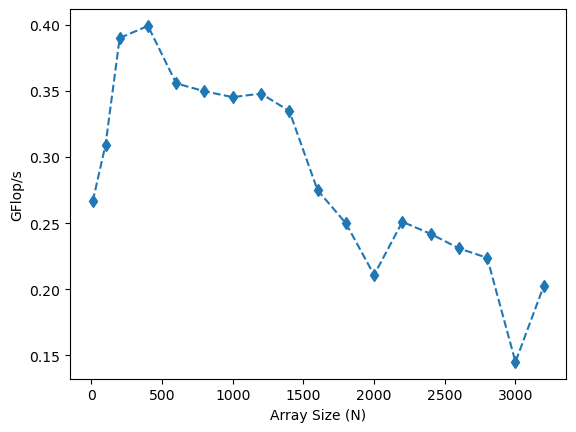

In [92]:
plt.figure()
plt.plot(n_array,performance,'--d')
plt.xlabel('Array Size (N)')
plt.ylabel('GFlop/s')
# plt.axhline(y=peakp, linestyle='--', color='red', label='Peak Performance')


#### Chris's i7 Matrix Runs

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_array = np.array([50*i for i in range(1, 21)] + [250*i for i in range(5,15)] + [500*i for i in range(8,11)], dtype=np.int64)

print(n_array)

rt_array = []

for n in n_array:
    rtfile = ('Cruntime'+str(n)+'.txt')
    rt_array = np.append(rt_array,float(np.mean(pd.read_table(rtfile,header = None))))

[  50  100  150  200  250  300  350  400  450  500  550  600  650  700
  750  800  850  900  950 1000 1250 1500 1750 2000 2250 2500 2750 3000
 3250 3500 4000 4500 5000]


c:\Users\chris\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\chris\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\chris\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\chris\anaconda3\lib\si

In [75]:
# Initialize an array to store the number of floating point operations.
flop_array = []

# Calculate the number of floating point operations for each array size. 
flop_array = (n_array**2)*(2*n_array-1)

#Calculate the performance in (Gflop/s)
performance = (flop_array/1e9)/rt_array

print(flop_array)

[      247500      1990000      6727500     15960000     31187500
     53910000     85627500    127840000    182047500    249750000
    332447500    431640000    548827500    685510000    843187500
   1023360000   1227527500   1457190000   1713847500   1999000000
   3904687500   6747750000  10715687500  15996000000  22776187500
  31243750000  41586187500  53991000000  68645687500  85737750000
 127984000000 182229750000 249975000000]


In [76]:
ncores = 4 #number of cores
clkspeed = 3.4 #3.4 GHz
fpus = 2 #assuming one FPU for now... (FPU/core??)

peakp = ncores*clkspeed*fpus

print("Theoretical Peak Performance:",peakp,"GFlop/s")

Theoretical Peak Performance: 27.2 GFlop/s


Text(0, 0.5, 'GFlop/s')

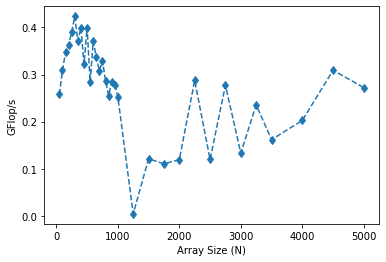

In [77]:
plt.figure()
plt.plot(n_array,performance,'--d')
plt.xlabel('Array Size (N)')
plt.ylabel('GFlop/s')
# plt.axhline(y=peakp, linestyle='--', color='red', label='Peak Performance')
